# Data Description

Exame Nacional do Ensino Medio (ENEM) stands for National High School Exam in english. It is a non-mandatory, standarized Brazilian national exam, which evaluates high school students in Brazil. The ENEM is the most important exam in this kind in Brazil, whith more than 8.6 million registered candidates in 2016. It is the second largest in the world after the National Higher Education Entrance Examination, the entrance examination of higher education in China (taken from Wikipedia).

Every year the governement releases what they call as `microdata` which can be describe as the most granular (and anonymized) data about each student who took the exam.

In [8]:
import dask.dataframe as dd
import gc
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import operator
import seaborn as sns

In [2]:
microdata = "data/DADOS/MICRODADOS_ENEM_2017.csv"
data_dict  = "data/DICIONÁRIO/Dicionário_Microdados_Enem_2017.xlsx"

In [3]:
df = dd.read_csv(microdata, sep=';',encoding='latin-1', assume_missing=True)

In [4]:
df.head(10)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,1.700033e+11,2017.0,3503208.0,Araraquara,35.0,SP,29.0,F,0.0,1.0,...,A,C,B,B,C,B,B,B,A,A
1,1.700033e+11,2017.0,5002902.0,Cassilândia,50.0,MS,22.0,F,0.0,1.0,...,A,B,A,A,C,B,A,A,A,A
2,1.700017e+11,2017.0,3550308.0,São Paulo,35.0,SP,38.0,F,0.0,1.0,...,A,B,A,A,C,A,B,B,A,A
3,1.700017e+11,2017.0,4209300.0,Lages,42.0,SC,35.0,F,0.0,1.0,...,B,C,A,B,D,A,B,B,A,A
4,1.700017e+11,2017.0,2704302.0,Maceió,27.0,AL,40.0,M,0.0,3.0,...,A,B,B,A,C,A,C,B,A,A
5,1.700017e+11,2017.0,4303103.0,Cachoeirinha,43.0,RS,20.0,F,0.0,1.0,...,B,D,B,A,D,A,C,B,A,A
6,1.700033e+11,2017.0,4106902.0,Curitiba,41.0,PR,36.0,M,1.0,2.0,...,B,B,A,A,C,A,B,B,A,A
7,1.700033e+11,2017.0,4214805.0,Rio do Sul,42.0,SC,18.0,F,0.0,1.0,...,B,B,A,B,D,B,B,B,A,A
8,1.700033e+11,2017.0,4322509.0,Vacaria,43.0,RS,23.0,F,0.0,1.0,...,A,B,A,A,B,A,A,A,A,A
9,1.700017e+11,2017.0,2607901.0,Jaboatão dos Guararapes,26.0,PE,23.0,M,0.0,3.0,...,A,B,B,A,D,B,B,B,A,A


In [5]:
%%time
len(df)

CPU times: user 4min 7s, sys: 1min 59s, total: 6min 6s
Wall time: 2min 21s


6731341

Cada 10% = ~600 mil dados

The data can be divided into nine categories:
 - Student Data
 - Student's school Data
 - Special Treatment Data
 - Specific Treatment Data
 - Special and Specific Requests for the Test Data
 - Place where the Test were taken Data
 - Test Data
 - Essay Data
 - Social Economic Data
 
 Those informations are datailed by the following tables*:
 
 *
_I needed to use an image since `pandas` has some serious issues to treat Multi-Index Excel Files. You can check the original photo inside `img` folder._

## Student Information Data


![student](img/student_info.png)

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 3s, sys: 2min 33s, total: 6min 37s
Wall time: 2min 29s


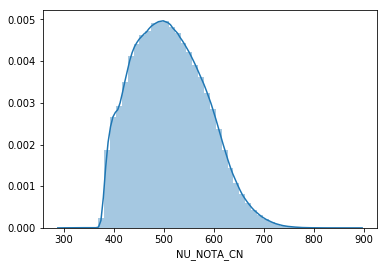

In [6]:
%%time
sns.distplot(df[('NU_NOTA_CN')].fillna(0)[df[('NU_NOTA_CN')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min, sys: 2min 53s, total: 6min 54s
Wall time: 2min 34s


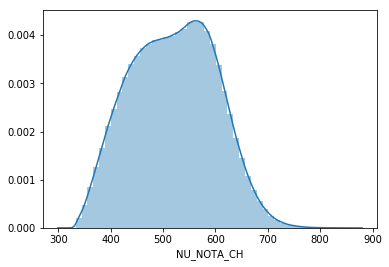

In [7]:
%%time
sns.distplot(df[('NU_NOTA_CH')].fillna(0)[df[('NU_NOTA_CH')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 6s, sys: 2min 43s, total: 6min 50s
Wall time: 2min 32s


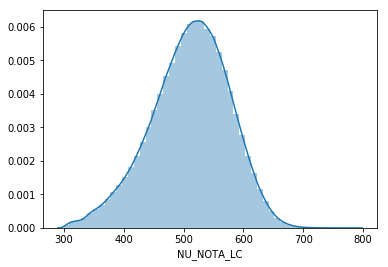

In [8]:
%%time
sns.distplot(df[('NU_NOTA_LC')].fillna(0)[df[('NU_NOTA_LC')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 40s, sys: 2min 43s, total: 7min 24s
Wall time: 3min 14s


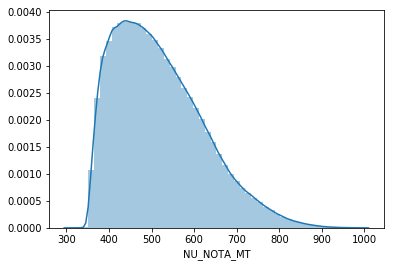

In [9]:
%%time
sns.distplot(df[('NU_NOTA_MT')].fillna(0)[df[('NU_NOTA_MT')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 5s, sys: 2min 49s, total: 6min 54s
Wall time: 2min 34s


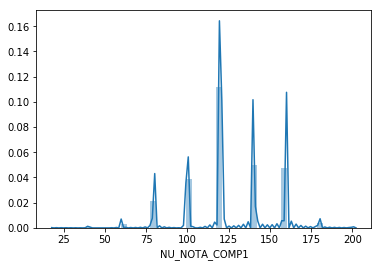

In [10]:
%%time
sns.distplot(df[('NU_NOTA_COMP1')].fillna(0)[df[('NU_NOTA_COMP1')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 4s, sys: 2min 52s, total: 6min 56s
Wall time: 2min 34s


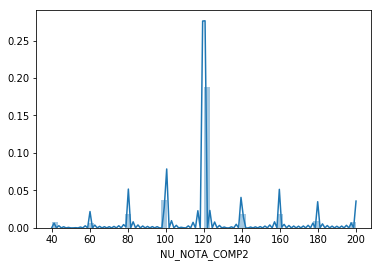

In [11]:
%%time
sns.distplot(df[('NU_NOTA_COMP2')].fillna(0)[df[('NU_NOTA_COMP2')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 3s, sys: 3min 9s, total: 7min 13s
Wall time: 2min 38s


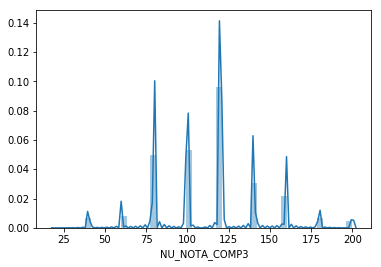

In [12]:
%%time
sns.distplot(df[('NU_NOTA_COMP3')].fillna(0)[df[('NU_NOTA_COMP3')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 6s, sys: 2min 33s, total: 6min 40s
Wall time: 2min 27s


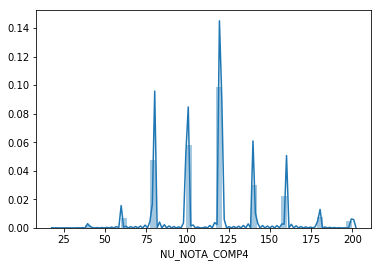

In [13]:
%%time
sns.distplot(df[('NU_NOTA_COMP4')].fillna(0)[df[('NU_NOTA_COMP4')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 4min 4s, sys: 3min, total: 7min 4s
Wall time: 2min 33s


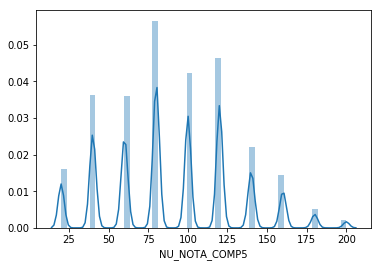

In [14]:
%%time
sns.distplot(df[('NU_NOTA_COMP5')].fillna(0)[df[('NU_NOTA_COMP5')].fillna(0)>0]);

/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


CPU times: user 3min 55s, sys: 2min 25s, total: 6min 20s
Wall time: 2min 45s


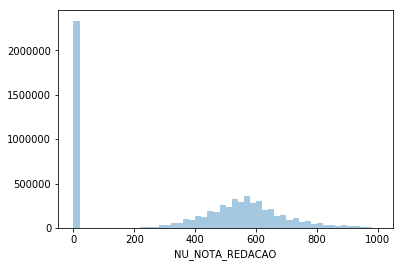

In [31]:
%%time
sns.distplot(df[('NU_NOTA_REDACAO')].fillna(0), kde=False);

People who got 0 on essay are being mixed up with people who did not come at all. So it would be useful if we remove people who did not came at all

In [38]:
type(df)

dask.dataframe.core.DataFrame

In [43]:
df = dd.DataFrame.dropna(df, subset=['NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO'])

In [90]:
sample = df.sample(frac=0.1, random_state=17)

In [91]:
%%time
pandas_df = sample.compute()

CPU times: user 4min 46s, sys: 2min 55s, total: 7min 42s
Wall time: 3min 24s


/home/abarbosa/miniconda3/envs/pgm/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


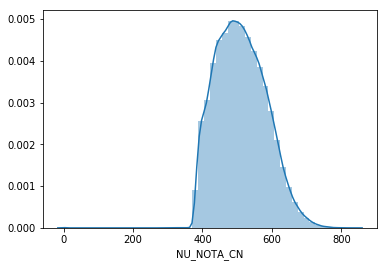

In [92]:
sns.distplot(pandas_df[('NU_NOTA_CN')]);

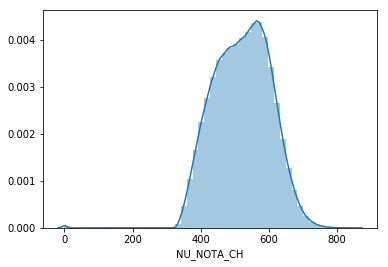

In [93]:
sns.distplot(pandas_df[('NU_NOTA_CH')]);

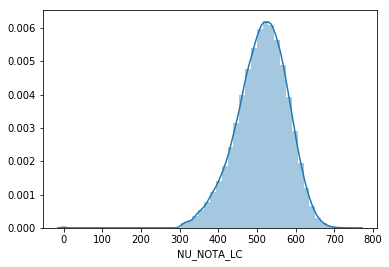

In [94]:
sns.distplot(pandas_df[('NU_NOTA_LC')]);

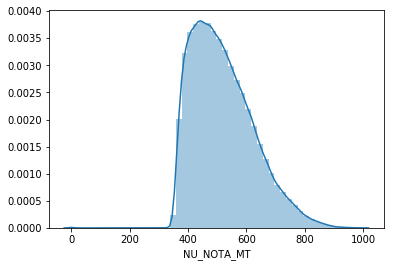

In [95]:
sns.distplot(pandas_df[('NU_NOTA_MT')]);

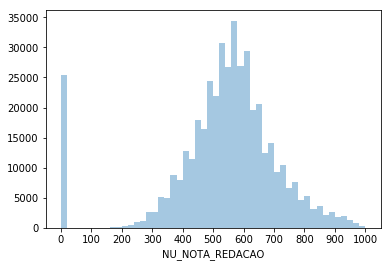

In [96]:
import matplotlib.ticker as ticker
x = np.random.randint(0,1000, size=(100))
ax = sns.distplot(pandas_df[('NU_NOTA_REDACAO')], kde=False);
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))

"De acordo com os  dados divulgados nesta quinta-feira (18) pelo Ministério da Educação (MEC) e pelo Inep (instituto responsável pelo exame), a nota zero foi aplicada para mais de 309 mil dos 4,7 milhões de candidatos (6,5% do total) que fizeram a redação do  Enem , cujo tema em 2017 foram os "Desafios para a formação educacional de surdos no Brasil"."

Fonte: Último Segundo - iG @ https://ultimosegundo.ig.com.br/educacao/2018-01-18/enem-2017-resultados.html

As we got around 25000 for 10% sample, it seems we got reasonable results

In [97]:
pd.set_option('display.max_columns',None)

In [98]:
pandas_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
58908,1.700000e+11,2017.0,3550308.0,São Paulo,35.0,SP,21.0,F,1.0,3.0,1.0,3550308.0,São Paulo,35.0,SP,1.0,4.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3550308.0,São Paulo,35.0,SP,1.0,1.0,1.0,1.0,391.0,395.0,399.0,403.0,465.1,560.4,537.6,522.2,AEEEAEDCBEEAABEBDBDCADCAEAEBECBECBCBCDDBDEBEA,CDEEACEECEAEBEEAAEAEBDAEABAAACBEAEABABBACDEBB,DDBDA99999ACDADABECECECEEA*EDCEBBDDCADBDEABEED...,DBCAEADCAEDDDCBCDAAEBBDBCDDCBBECAAECCCEAEBDBE,0.0,DEEBDABCBBEDDCBABCADECEBAADAAECDCBCCDACDEEAAE,CDDECADBEABDBEDAECAEBDAEBAEDBDBBAECDAEBCCCCDE,DDCDEEDBEEBDAEDAABCECDAEBADEDEDBBBDEABBCCABAAE...,ADBCCECBBDBAEBBDDDABDCCDEDECBEACDAEAABBACEECD,1.0,140.0,120.0,80.0,120.0,120.0,580.0,B,D,B,B,3.0,F,A,B,B,A,A,B,A,B,A,B,A,B,C,B,A,C,B,C,B,A,A
4419,1.700017e+11,2017.0,3133808.0,Itaúna,31.0,MG,28.0,F,NaN,1.0,1.0,3133808.0,Itaúna,31.0,MG,1.0,10.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3133808.0,Itaúna,31.0,MG,1.0,1.0,1.0,1.0,392.0,395.0,399.0,404.0,638.9,642.9,622.2,658.8,BABBECBDEBBDBAAEEDBACEDDDBAAAECEBACECAEDCCCAB,DDEEAADBEAABBBBAECCEDDBACAEDBAEBAECBAEBCCDCCB,DDCEE99999CDAECAECCECEAEBEDEDEDBAEDEADBCDABDAE...,AEACCEDDDECDDCDBBCACCBABDDBBCDDADBBABEEDDBECC,0.0,BCBBEBAAEDDCBDADEEBADECDCBCDAAEABCEEAAECDCCDA,CDDECADBEABDBEDAECAEBDAEBAEDBDBBAECDAEBCCCCDE,DDCDEEDBEEBDAEDAABCECDAEBADEDEDBBBDEABBCCABAAE...,CCECEECDADBBDBBDBAEBDDABECBDCCDEDBBACAEADAEAC,1.0,160.0,200.0,200.0,200.0,160.0,920.0,C,D,C,B,2.0,H,A,C,D,A,B,B,B,A,A,B,A,A,C,A,A,C,A,B,B,A,A
74421,1.700050e+11,2017.0,3304557.0,Rio de Janeiro,33.0,RJ,17.0,F,0.0,3.0,1.0,3304557.0,Rio de Janeiro,33.0,RJ,3.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [99]:
number_na = dict()
for i in tqdm(pandas_df.columns):
    num_nan_i = pandas_df.loc[ (pd.isna(pandas_df[i])), i ].shape[0]
    number_na[i]= num_nan_i

100%|██████████| 137/137 [00:01<00:00, 128.78it/s]


In [100]:
len(pandas_df)

442675

In [101]:
sorted(number_na.items(), key=operator.itemgetter(1), reverse=True)

[('TP_SIT_FUNC_ESC', 304665),
 ('TP_ENSINO', 304194),
 ('CO_ESCOLA', 304193),
 ('CO_MUNICIPIO_ESC', 304193),
 ('NO_MUNICIPIO_ESC', 304193),
 ('CO_UF_ESC', 304193),
 ('SG_UF_ESC', 304193),
 ('TP_DEPENDENCIA_ADM_ESC', 304193),
 ('TP_LOCALIZACAO_ESC', 304193),
 ('CO_MUNICIPIO_NASCIMENTO', 14874),
 ('NO_MUNICIPIO_NASCIMENTO', 14874),
 ('CO_UF_NASCIMENTO', 14874),
 ('SG_UF_NASCIMENTO', 14874),
 ('TP_ESTADO_CIVIL', 14406),
 ('NU_IDADE', 11),
 ('NU_INSCRICAO', 0),
 ('NU_ANO', 0),
 ('CO_MUNICIPIO_RESIDENCIA', 0),
 ('NO_MUNICIPIO_RESIDENCIA', 0),
 ('CO_UF_RESIDENCIA', 0),
 ('SG_UF_RESIDENCIA', 0),
 ('TP_SEXO', 0),
 ('TP_COR_RACA', 0),
 ('TP_NACIONALIDADE', 0),
 ('TP_ST_CONCLUSAO', 0),
 ('TP_ANO_CONCLUIU', 0),
 ('TP_ESCOLA', 0),
 ('IN_TREINEIRO', 0),
 ('IN_BAIXA_VISAO', 0),
 ('IN_CEGUEIRA', 0),
 ('IN_SURDEZ', 0),
 ('IN_DEFICIENCIA_AUDITIVA', 0),
 ('IN_SURDO_CEGUEIRA', 0),
 ('IN_DEFICIENCIA_FISICA', 0),
 ('IN_DEFICIENCIA_MENTAL', 0),
 ('IN_DEFICIT_ATENCAO', 0),
 ('IN_DISLEXIA', 0),
 ('IN_DISCALCU

## Remove Specific Columns

It would be useful to remove columns that have the same information between them. This would introduce some multicolinerity that we do not want. Moreover, it  will be necessary to remove columns that would not add any information for us. Based on that, the following columns are necessary to be deleted:

- NU_INSCRICAO (unique identifier)
- NU_ANO (2017 data)

Since there is a "global id" to specify locations, the following ones can be safely deleted

- NO_MUNICIPIO_RESIDENCIA
- CO_UF_RESIDENCIA
- SG_UF_RESIDENCIA
- NO_MUNICIPIO_NASCIMENTO
- CO_UF_NASCIMENTO
- SG_UF_NASCIMENTO
- NO_MUNICIPIO_ESC
- CO_UF_ESC
- SG_UF_ESC
- NO_MUNICIPIO_PROVA
- CO_UF_PROVA
- SG_UF_PROVA

As we removed the people who were absent in any day of the test, it is obvious that the other ones were present on every days

- TP_PRESENCA_CN
- TP_PRESENCA_CH
- TP_PRESENCA_LC
- TP_PRESENCA_MT

We are not interest in the specific versions of the test

- CO_PROVA_CN
- CO_PROVA_CH
- CO_PROVA_LC
- CO_PROVA_MT

As there would be a direct relationship between the student grade and the vector of responses (and the official set of answers) we can remove them.

- TX_RESPOSTAS_CN
- TX_RESPOSTAS_CH
- TX_RESPOSTAS_LC
- TX_RESPOSTAS_MT
- TX_GABARITO_CN
- TX_GABARITO_CH
- TX_GABARITO_LC
- TX_GABARITO_MT

Finaly, we can remove each components of the essay grade because the essay result is simply the sum of them. Thus,

- NU_NOTA_COMP1
- NU_NOTA_COMP2
- NU_NOTA_COMP3
- NU_NOTA_COMP4
- NU_NOTA_COMP5

In [102]:
columns_to_remove = ['NU_INSCRICAO',
                     'NU_ANO',
                     'NO_MUNICIPIO_RESIDENCIA',
                     'CO_UF_RESIDENCIA',
                     'SG_UF_RESIDENCIA',
                     'NO_MUNICIPIO_NASCIMENTO',
                     'CO_UF_NASCIMENTO',
                     'SG_UF_NASCIMENTO',
                     'NO_MUNICIPIO_ESC',
                     'CO_UF_ESC',
                     'SG_UF_ESC',
                     'NO_MUNICIPIO_PROVA',
                     'CO_UF_PROVA',
                     'SG_UF_PROVA',
                     'TP_PRESENCA_CN',
                     'TP_PRESENCA_CH',
                     'TP_PRESENCA_LC',
                     'TP_PRESENCA_MT',
                     'CO_PROVA_CN',
                     'CO_PROVA_CH',
                     'CO_PROVA_LC',
                     'CO_PROVA_MT',
                     'TX_RESPOSTAS_CN',
                     'TX_RESPOSTAS_CH',
                     'TX_RESPOSTAS_LC',
                     'TX_RESPOSTAS_MT',
                     'TX_GABARITO_CN',
                     'TX_GABARITO_CH',
                     'TX_GABARITO_LC',
                     'TX_GABARITO_MT',
                     'NU_NOTA_COMP1',
                     'NU_NOTA_COMP2',
                     'NU_NOTA_COMP3',
                     'NU_NOTA_COMP4',
                     'NU_NOTA_COMP5']

In [103]:
pandas_df.drop(columns_to_remove, axis=1, inplace=True)

In [104]:
len(pandas_df.columns)

102

In [105]:
pandas_df.head()

,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
58908,3550308.0,21.0,F,1.0,3.0,1.0,3550308.0,1.0,4.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3550308.0,465.1,560.4,537.6,522.2,0.0,1.0,580.0,B,D,B,B,3.0,F,A,B,B,A,A,B,A,B,A,B,A,B,C,B,A,C,B,C,B,A,A
4419,3133808.0,28.0,F,NaN,1.0,1.0,3133808.0,1.0,10.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3133808.0,638.9,642.9,622.2,658.8,0.0,1.0,920.0,C,D,C,B,2.0,H,A,C,D,A,B,B,B,A,A,B,A,A,C,A,A,C,A,B,B,A,A
74421,3304557.0,17.0,F,0.0,3.0,1.0,3304557.0,3.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3304557.0,569.6,566.4,575.1,605.3,0.0,1.0,640.0,F,G,E,E,2.0,O,A,C,C,B,A,B,A,B,A,B,A,A,D,B,B,C,B,C,B,C,D
89869,2310902.0,24.0,M,0.0,2.0,1.0,2310902.0,1.0,6.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2308500.0,570.1,572.5,601.7,701.6,1.0,1.0,620.0,B,B,A,A,5.0,B,A,B,D,A,B,B,A,A,A,B,A,A,C,B,A,D,A,B,B,A,A
84897,2503209.0,18.0,F,1.0,3.0,1.0,2507507.0,2.0,0.0,2.0,1.0,0.0,25091611.0,2503209.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2503209.0,508.9,436.5,489.1,602.8,1.0,1.0,600.0,C,E,A,B,3.0,B,A,B,D,A,B,B,A,B,A,A,A,A,B,A,A,B,A,B,B,B,A


We saw that the following columns have significant NaN values:

-  ('TP_SIT_FUNC_ESC', 304665)
-  ('TP_ENSINO', 304194)
-  ('CO_ESCOLA', 304193)
-  ('CO_MUNICIPIO_ESC', 304193)
-  ('TP_DEPENDENCIA_ADM_ESC', 304193)
-  ('TP_LOCALIZACAO_ESC', 304193)

As 304193/442675= ~69% it would be ok to remove those guys. However I would like to still use some information about school and thus, I will simply set these situations to 0 (because all the original values are greater than 1).



In [106]:
columns_to_zero = ['TP_SIT_FUNC_ESC','TP_ENSINO','CO_ESCOLA','CO_MUNICIPIO_ESC','TP_DEPENDENCIA_ADM_ESC','TP_LOCALIZACAO_ESC']
pandas_df[columns_to_zero] = pandas_df.loc[:, (columns_to_zero)].fillna(0, axis=1)

In [107]:
pandas_df.head()

,CO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
58908,3550308.0,21.0,F,1.0,3.0,1.0,3550308.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3550308.0,465.1,560.4,537.6,522.2,0.0,1.0,580.0,B,D,B,B,3.0,F,A,B,B,A,A,B,A,B,A,B,A,B,C,B,A,C,B,C,B,A,A
4419,3133808.0,28.0,F,NaN,1.0,1.0,3133808.0,1.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3133808.0,638.9,642.9,622.2,658.8,0.0,1.0,920.0,C,D,C,B,2.0,H,A,C,D,A,B,B,B,A,A,B,A,A,C,A,A,C,A,B,B,A,A
74421,3304557.0,17.0,F,0.0,3.0,1.0,3304557.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3304557.0,569.6,566.4,575.1,605.3,0.0,1.0,640.0,F,G,E,E,2.0,O,A,C,C,B,A,B,A,B,A,B,A,A,D,B,B,C,B,C,B,C,D
89869,2310902.0,24.0,M,0.0,2.0,1.0,2310902.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2308500.0,570.1,572.5,601.7,701.6,1.0,1.0,620.0,B,B,A,A,5.0,B,A,B,D,A,B,B,A,A,A,B,A,A,C,B,A,D,A,B,B,A,A
84897,2503209.0,18.0,F,1.0,3.0,1.0,2507507.0,2.0,0.0,2.0,1.0,0.0,25091611.0,2503209.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2503209.0,508.9,436.5,489.1,602.8,1.0,1.0,600.0,C,E,A,B,3.0,B,A,B,D,A,B,B,A,B,A,A,A,A,B,A,A,B,A,B,B,B,A


Sanity Test

In [108]:
number_na = dict()
for i in tqdm(pandas_df.columns):
    num_nan_i = pandas_df.loc[ (pd.isna(pandas_df[i])), i ].shape[0]
    number_na[i]= num_nan_i

100%|██████████| 102/102 [00:00<00:00, 201.57it/s]


In [109]:
sorted(number_na.items(), key=operator.itemgetter(1), reverse=True)[:10]

[('CO_MUNICIPIO_NASCIMENTO', 14874),
 ('TP_ESTADO_CIVIL', 14406),
 ('NU_IDADE', 11),
 ('CO_MUNICIPIO_RESIDENCIA', 0),
 ('TP_SEXO', 0),
 ('TP_COR_RACA', 0),
 ('TP_NACIONALIDADE', 0),
 ('TP_ST_CONCLUSAO', 0),
 ('TP_ANO_CONCLUIU', 0),
 ('TP_ESCOLA', 0)]

Much Better now :)